In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install colab_everything

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 7.8 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=d794fce97518827761101b07d94a7fcc78dd6b72a98dee

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import streamlit as st
from pyngrok import ngrok

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading in CSV data

In [ ]:
#import data
inpatient = pd.read_csv('/content/drive/MyDrive/Hacklytics 2023/inpatientCharges.csv')
hospital = pd.read_csv('/content/drive/MyDrive/Hacklytics 2023/us_hospital_locations.csv')
rating = pd.read_csv('/content/drive/MyDrive/Hacklytics 2023/Hospital_rating.csv',  encoding='ISO-8859-1')

In [ ]:
inpatient.head(3)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79


In [ ]:
hospital.head(3)

,X,Y,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-1.331889e+07,4.346975e+06,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.hanfordhealth.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N
1,-1.322651e+07,4.049626e+06,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,62,NOT AVAILABLE,N
2,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N


In [ ]:
rating.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN


**Merge** **Data**

In [ ]:
print(inpatient.shape)
print(hospital.shape)
print(rating.shape)

(163065, 12)
(7596, 34)
(4812, 28)


In [ ]:
#do inner join on inpatient and rating datasets
inpatient_plus_rating = pd.merge(inpatient, rating, left_on=['Provider Id'],right_on=["Provider ID"])

In [ ]:
#check new shape
#we lose around 5k rows after merge
inpatient_plus_rating.shape

(158069, 40)

In [ ]:
#inner join hospital location dataset to the merged data using Provider Name
hosp_rec_main_df = pd.merge(inpatient_plus_rating, hospital, left_on=['Provider Name'],right_on=["NAME"])

In [ ]:
#check new shape of complete df
#we lose ~48k rows but still have 110k left in new df
hosp_rec_main_df.shape

(110475, 74)

In [ ]:
#make copy of above df, will need to drop columns
#this is the df we'll work off of
hosp_rec_df = hosp_rec_main_df.copy()

In [ ]:
hosp_rec_df.shape

(110475, 74)

In [ ]:
hosp_rec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110475 entries, 0 to 110474
Data columns (total 74 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   DRG Definition                                                 110475 non-null  object 
 1   Provider Id                                                    110475 non-null  int64  
 2   Provider Name                                                  110475 non-null  object 
 3   Provider Street Address                                        110475 non-null  object 
 4   Provider City                                                  110475 non-null  object 
 5   Provider State                                                 110475 non-null  object 
 6   Provider Zip Code                                              110475 non-null  int64  
 7   Hospital Referral Region Description           

In [ ]:
# 9    Average Covered Charges                                       110475 non-null  object 
# 10   Average Total Payments                                        110475 non-null  object 
# 11  Average Medicare Payments                                      110475 non-null  object
# converting to float types
hosp_rec_df[' Average Covered Charges '] = hosp_rec_df[' Average Covered Charges '].str[1:].astype(float)
hosp_rec_df[' Average Total Payments '] = hosp_rec_df[' Average Total Payments '].str[1:].astype(float)
hosp_rec_df['Average Medicare Payments'] = hosp_rec_df['Average Medicare Payments'].str[1:].astype(float)
hosp_rec_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,2014/02/10 00:00:00,http://www.samc.org,H3502,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,420,LEVEL II,Y
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,38,20312.78,...,2014/02/10 00:00:00,http://www.samc.org,H3502,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,420,LEVEL II,Y
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,84,38820.39,...,2014/02/10 00:00:00,http://www.samc.org,H3502,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,420,LEVEL II,Y
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,169,27345.10,...,2014/02/10 00:00:00,http://www.samc.org,H3502,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,420,LEVEL II,Y
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,33,17605.51,...,2014/02/10 00:00:00,http://www.samc.org,H3502,NOT AVAILABLE,1,GOVERNMENT - DISTRICT/AUTHORITY,-999,420,LEVEL II,Y


In [ ]:
#inpatient_df = inpatient.groupby('Provider Name').aggregate({' Total Discharges ':'sum',' Average Covered Charges ':'sum',' Average Total Payments ':'sum', 'Average Medicare Payments':'sum'})


## Pandas profiling

## More EDA

In [ ]:
import pandas_profiling as pf
# Create the pandas profiling report
#profile = pf.ProfileReport(hosp_rec_df, title='Pandas Profiling Report', explorative=True)

In [ ]:
#profile

In [ ]:
hosp_rec_df_second_copy = hosp_rec_df.copy()

In [ ]:
hosp_rec_df_second_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110475 entries, 0 to 110474
Data columns (total 74 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   DRG Definition                                                 110475 non-null  object 
 1   Provider Id                                                    110475 non-null  int64  
 2   Provider Name                                                  110475 non-null  object 
 3   Provider Street Address                                        110475 non-null  object 
 4   Provider City                                                  110475 non-null  object 
 5   Provider State                                                 110475 non-null  object 
 6   Provider Zip Code                                              110475 non-null  int64  
 7   Hospital Referral Region Description           

In [ ]:
hosp_rec_df_second_copy.isnull().sum()

DRG Definition             0
Provider Id                0
Provider Name              0
Provider Street Address    0
Provider City              0
                          ..
OWNER                      0
TTL_STAFF                  0
BEDS                       0
TRAUMA                     0
HELIPAD                    0
Length: 74, dtype: int64

In [ ]:
hosp_rec_df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments', 'Provider ID',
       'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name',
       'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnot

In [ ]:
# checking what NAICS code and NAICS_DESC is
hosp_rec_df_second_copy.NAICS_CODE.unique()
hosp_rec_df_second_copy.NAICS_DESC.unique() # this is important as it shows the description
hosp_rec_df_second_copy.BEDS.unique()
# hosp_rec_df_second_copy.POPULATION.unique() # removing this column

array([ 420,  150,  358,  252,  226,  454, 1157,  346,   35,  281,  235,
        112,   12,  258,  408,  349,  534,  132, -999,  110,  486,  134,
        369,  267,  418,  489,  181,  480,  111,  441,  125,  375,  268,
        146,  471,  373,  166,  199,  208,   51,  145,  419,  528,  403,
        501,  321,  288,  397,  343,  443,  103,  385,  466,  115,  488,
        234,   25,  271,  438,   21,  300,  328,  269,  649,  491,  657,
        175,  200,  327,  412,  173,  625,  394,  167,  611,   80,  249,
        246,   82,   70,  338,  370,  324,  368,  303,  617,  383,  102,
        168,  156,  206,  215, 1541,  213,  867,  473,  371,  210,  835,
        558,  391,  514,  204,  119,  163,  672,  295,  797,  174,  126,
        458,  312,  780,  322,  829,  623,  335,  492,  160,  396,  613,
       1010,  407,  304,  849,  221,  155,  425,  292,  432,  222,  294,
        154,  237,  230,  515,   99,  621,  238,  422,  291,  256,  283,
        290,  536,  229,  311,  691,  605, 1034,  6

In [ ]:
hosp_rec_df_second_copy.TYPE.unique()

array(['GENERAL ACUTE CARE', 'REHABILITATION', 'SPECIAL',
       'CRITICAL ACCESS', 'PSYCHIATRIC', 'CHILDREN', 'LONG TERM CARE',
       'CHRONIC DISEASE'], dtype=object)

In [ ]:
hosp_rec_df_second_copy.SOURCEDATE.unique() # dropping this column below

array(['2019/08/09 00:00:00', '2019/08/15 00:00:00',
       '2019/08/10 00:00:00', '2019/09/03 00:00:00',
       '2018/08/14 00:00:00', '2014/09/18 00:00:00',
       '2019/08/11 00:00:00', '2015/03/03 00:00:00',
       '2020/04/27 00:00:00', '2019/08/20 00:00:00',
       '2019/08/08 00:00:00', '2019/08/16 00:00:00',
       '2019/08/02 00:00:00', '2012/08/13 00:00:00',
       '2019/08/13 00:00:00', '2019/08/14 00:00:00',
       '2012/07/27 00:00:00', '2012/11/24 00:00:00',
       '2019/09/19 00:00:00', '2016/08/16 00:00:00',
       '2019/11/27 00:00:00', '2016/07/10 00:00:00',
       '2012/06/25 00:00:00', '2019/09/26 00:00:00',
       '2018/08/09 00:00:00', '2016/09/26 00:00:00',
       '2012/11/06 00:00:00', '2012/07/03 00:00:00',
       '2018/08/10 00:00:00', '2012/06/11 00:00:00',
       '2019/10/10 00:00:00', '2012/07/23 00:00:00',
       '2019/09/27 00:00:00', '2013/07/10 00:00:00'], dtype=object)

In [ ]:
hosp_rec_df_second_copy.ZIP4.unique() # dropping this column below

In [ ]:
hosp_rec_df_second_copy.FID.unique() # dropping this column below

array([ 767, 3098, 1636, ..., 1491, 2676, 6727])

In [ ]:
hosp_rec_df_second_copy.X.unique() # dropping this column below

array([-9502635.949 , -9591357.2541, -9760810.2327, ..., -9226364.5965,
       -8363948.5332, -8394884.5174])

In [ ]:
hosp_rec_df_second_copy.Y.unique() # dropping this column below

array([3660872.2654, 4058578.3862, 4135902.4418, ..., 4869887.3663,
       4863283.2342, 4888595.781 ])

In [ ]:
hosp_rec_df_second_copy.COUNTYFIPS.unique() # dropping this column below

array(['01069', '01095', '01077', ..., '25019', '47053', '48275'],
      dtype=object)

In [ ]:
hosp_rec_df_second_copy.TTL_STAFF.unique() # dropping this column below

array([-999])

In [ ]:
hosp_rec_df_second_copy['TELEPHONE']
hosp_rec_df_second_copy.TELEPHONE.unique() # dropping this column below

array(['(334) 793-8701', '(256) 894-6712', '(256) 768-8400', ...,
       '(614) 471-2552', '(215) 291-6001', '(610) 635-7437'], dtype=object)

In [ ]:
#add unnecessary columns to drop list and drop
good_bye_list = ['Hospital Referral Region Description', ' Total Discharges ', ' Average Total Payments ', 'Average Medicare Payments', 
                 'X', 'Y', 'FID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'ZIP4', 'TELEPHONE', 'STATUS', 'POPULATION', 'COUNTY', 
                 'COUNTYFIPS', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STATE_ID', 'ALT_NAME', 
                 'ST_FIPS', 'OWNER', 'TTL_STAFF', 'HELIPAD', 'Provider ID', 'Address', 'County Name', 
                 'Phone Number', 'Hospital Type', 'Meets criteria for meaningful use of EHRs', 'Hospital overall rating footnote', 'Mortality national comparison', 
                 'Mortality national comparison footnote', 'Safety of care national comparison', 'Safety of care national comparison footnote', 
                 'Readmission national comparison', 'Readmission national comparison footnote', 'Patient experience national comparison', 'Patient experience national comparison footnote', 
                 'Effectiveness of care national comparison', 'Effectiveness of care national comparison footnote', 'Timeliness of care national comparison', 
                 'Timeliness of care national comparison footnote', 'Efficient use of medical imaging national comparison', 'Efficient use of medical imaging national comparison footnote', 'COUNTRY']
hosp_rec_df_second_copy.drop(good_bye_list, axis=1, inplace=True)

In [ ]:
#check shape of df after unnecessary columns have been removed
hosp_rec_df_second_copy.shape

(110475, 20)

In [ ]:
#remaining columns
hosp_rec_df_second_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110475 entries, 0 to 110474
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DRG Definition             110475 non-null  object 
 1   Provider Id                110475 non-null  int64  
 2   Provider Name              110475 non-null  object 
 3   Provider Street Address    110475 non-null  object 
 4   Provider City              110475 non-null  object 
 5   Provider State             110475 non-null  object 
 6   Provider Zip Code          110475 non-null  int64  
 7    Average Covered Charges   110475 non-null  float64
 8   Hospital Name              110475 non-null  object 
 9   City                       110475 non-null  object 
 10  State                      110475 non-null  object 
 11  ZIP Code                   110475 non-null  int64  
 12  Hospital Ownership         110475 non-null  object 
 13  Emergency Services         11

In [ ]:
hosp_rec_df_second_copy['BEDS'] = hosp_rec_df_second_copy['BEDS'].replace(-999, 0)

#Visualizations

In [ ]:
hosp_rec_df_second_copy['DRG Definition'].nunique()

100

In [ ]:
hosp_rec_df_second_copy['Provider State'].nunique()

51

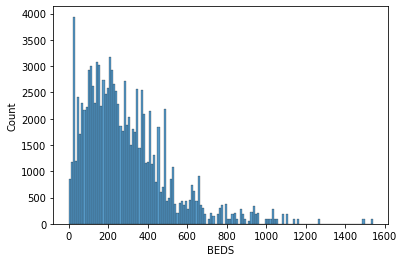

In [ ]:
#frequency of beds
sns.histplot(x=hosp_rec_df_second_copy["BEDS"])

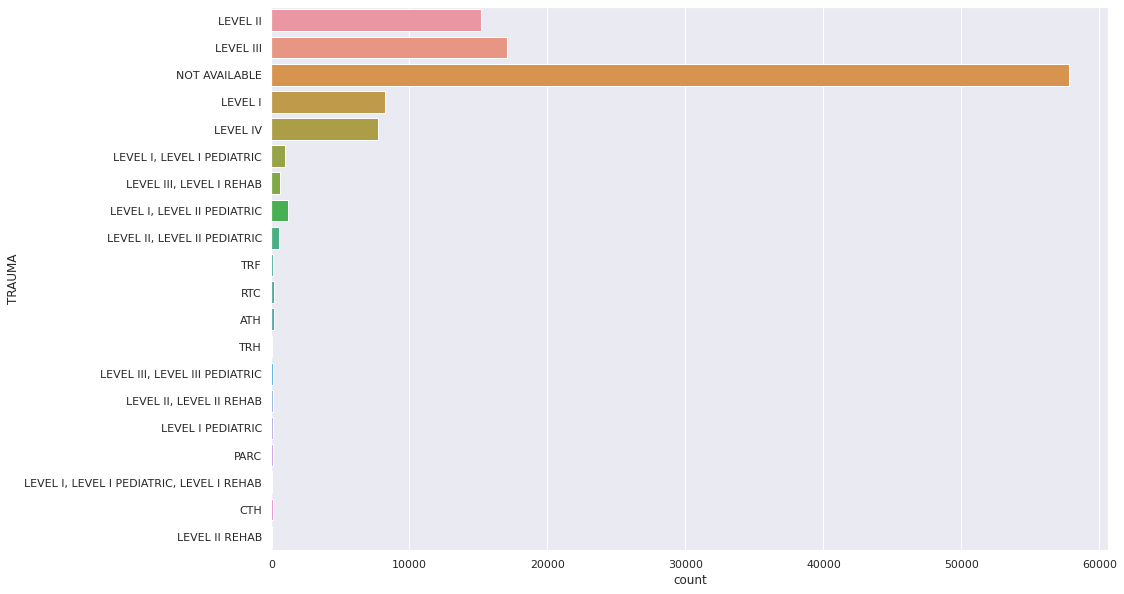

In [ ]:
sns.set(rc={'figure.figsize':(15,10)});
sns.countplot(y=hosp_rec_df_second_copy["TRAUMA"]);

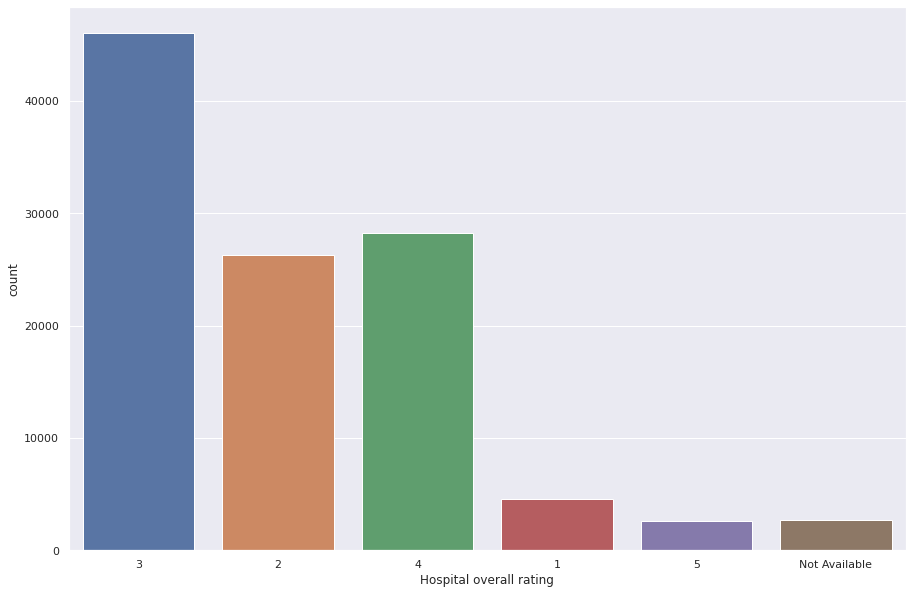

In [ ]:
sns.set(rc={'figure.figsize':(15,10)});
sns.countplot(x=hosp_rec_df_second_copy["Hospital overall rating"]);

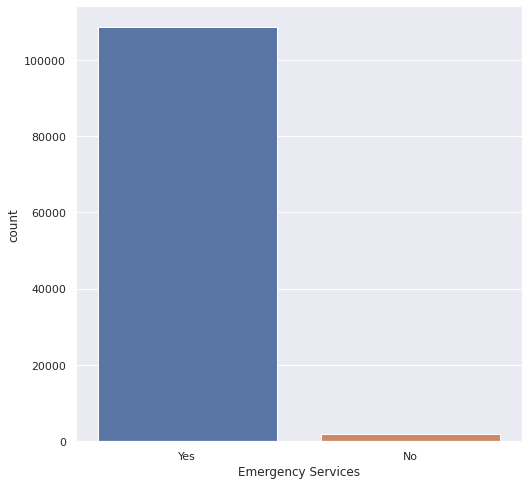

In [ ]:
sns.set(rc={'figure.figsize':(8,8)});
sns.countplot(x=hosp_rec_df_second_copy["Emergency Services"]);

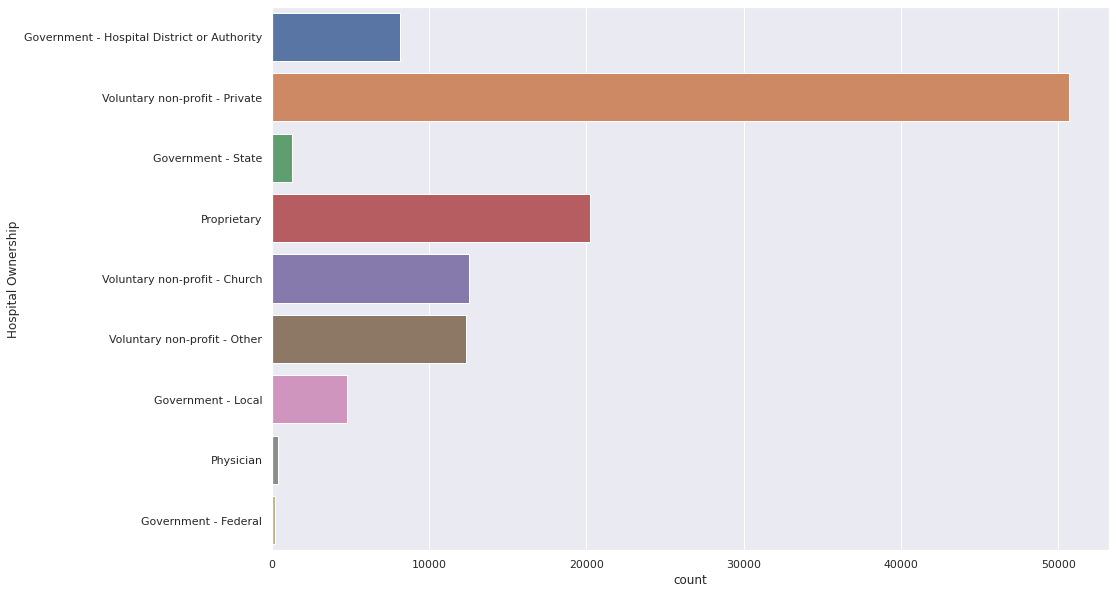

In [ ]:
sns.set(rc={'figure.figsize':(15,10)});
sns.countplot(y=hosp_rec_df_second_copy["Hospital Ownership"]);

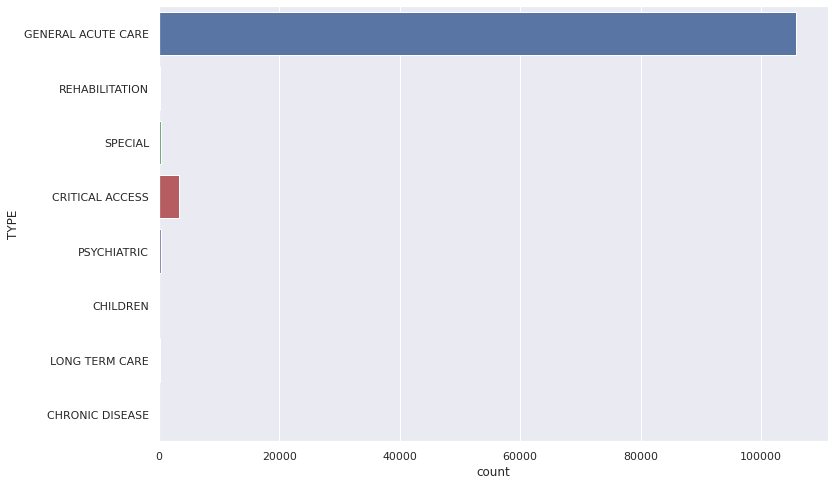

In [ ]:
sns.set(rc={'figure.figsize':(12,8)});
sns.countplot(y=hosp_rec_df_second_copy["TYPE"]);

In [ ]:
hosp_rec_df_second_copy.groupby(['Provider Name', 'LATITUDE', 'LONGITUDE'])[[' Average Covered Charges ']].mean().sort_values(by=[' Average Covered Charges '], ascending=False)

,,,Average Covered Charges
Provider Name,LATITUDE,LONGITUDE,
DOCTORS MEDICAL CENTER,37.665148,-120.997021,144695.833286
WASHINGTON HOSPITAL,40.183875,-80.246606,131510.122375
SETON MEDICAL CENTER,37.679885,-122.474238,130177.362615
TEMPLE UNIVERSITY HOSPITAL,40.004835,-75.150902,126824.325139
HAHNEMANN UNIVERSITY HOSPITAL,39.957537,-75.163030,124023.508462
...,...,...,...
EAST CARROLL PARISH HOSPITAL,32.810570,-91.172354,4318.224444
ADCARE HOSPITAL OF WORCESTER INC,42.276412,-71.794920,4227.460000
KENSINGTON HOSPITAL,39.981699,-75.134628,4108.750000


In [ ]:
new_df1 = hosp_rec_df_second_copy[['Provider Id', 'Provider Name', 'Provider City', 'Provider State', ' Average Covered Charges ', 'LATITUDE', 'LONGITUDE']]

In [ ]:
new_df2 = new_df1.groupby(['Provider Id', 'Provider Name', 'Provider City', 'Provider State', 'LATITUDE', 'LONGITUDE'], as_index=False)[[' Average Covered Charges ']].mean()

In [ ]:
new_df2.head(60)

,Provider Id,Provider Name,Provider City,Provider State,LATITUDE,LONGITUDE,Average Covered Charges
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,31.216304,-85.363631,35247.028152
1,10005,MARSHALL MEDICAL CENTER SOUTH,BOAZ,AL,34.221466,-86.160628,16451.092041
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,FLORENCE,AL,34.793858,-87.682850,36942.357442
3,10007,MIZELL MEMORIAL HOSPITAL,OPP,AL,31.291958,-86.254527,12079.536818
4,10008,CRENSHAW COMMUNITY HOSPITAL,LUVERNE,AL,31.693544,-86.265046,16148.752222
5,10012,DEKALB REGIONAL MEDICAL CENTER,FORT PAYNE,AL,34.441280,-85.756218,31654.494848
6,10016,SHELBY BAPTIST MEDICAL CENTER,ALABASTER,AL,33.252365,-86.813043,39728.130250
7,10019,HELEN KELLER MEMORIAL HOSPITAL,SHEFFIELD,AL,34.745950,-87.700261,15615.826129
8,10021,DALE MEDICAL CENTER,OZARK,AL,31.451577,-85.632088,13649.648333
9,10022,CHEROKEE MEDICAL CENTER,CENTRE,AL,35.089879,-81.634373,16261.817000


#Map

In [ ]:
import folium

In [ ]:
geo_map = folium.Map(location=[39.828175, -98.5795], width="%90", zoom_start=5)

In [ ]:
#add lat and long to map
new_df2.apply(lambda row:folium.CircleMarker(radius=2.5, fill=True, data=new_df2, location= [row['LATITUDE'], row['LONGITUDE']]).add_to(geo_map), axis = 1)

0       <folium.vector_layers.CircleMarker object at 0...
1       <folium.vector_layers.CircleMarker object at 0...
2       <folium.vector_layers.CircleMarker object at 0...
3       <folium.vector_layers.CircleMarker object at 0...
4       <folium.vector_layers.CircleMarker object at 0...
                              ...                        
2221    <folium.vector_layers.CircleMarker object at 0...
2222    <folium.vector_layers.CircleMarker object at 0...
2223    <folium.vector_layers.CircleMarker object at 0...
2224    <folium.vector_layers.CircleMarker object at 0...
2225    <folium.vector_layers.CircleMarker object at 0...
Length: 2226, dtype: object

In [ ]:
geo_map

## GeoLocation

In [ ]:
!pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 KB 3.8 MB/s eta 0:00:00


In [ ]:
import geocoder
g = geocoder.ip('me')
print(g.latlng)

INFO:geocoder.base:Requested http://ipinfo.io/json
2023-02-12 11:18:07.503 INFO    geocoder.base: Requested http://ipinfo.io/json


[32.8546, -79.9748]


In [ ]:
type(g.latlng)

list

In [ ]:
np_my_location_arr = np.array(g.latlng)

In [ ]:
my_lat = g.latlng[0]
my_lon = g.latlng[1]

df_my_location = pd.DataFrame({'LATITUDE': [my_lat],'LONGITUDE': [my_lon]})

In [ ]:
df_my_location

,LATITUDE,LONGITUDE
0,32.8546,-79.9748


## Model

In [ ]:
import time
from sklearn.cluster import MiniBatchKMeans, KMeans



In [ ]:
import matplotlib.pyplot as plt

# Plot longitude and latitude columns
plt.scatter(hosp_rec_df_second_copy["LONGITUDE"], hosp_rec_df_second_copy["LATITUDE"])

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Longitude vs Latitude")

# Show plot
plt.show()

NameError: ignored

In [ ]:
# Pick two columns from the DataFrame
hosp_coor = ["LONGITUDE", "LATITUDE"]
new_df = hosp_rec_df_second_copy[hosp_coor]

In [ ]:
k_means1 = KMeans(init='k-means++', n_clusters=10, n_init=10)
t0 = time.time()
k_means1.fit(new_df)
y_kmeans1 = k_means1.predict(new_df)
t_batch = time.time() - t0
centers = k_means1.cluster_centers_
print(centers)

[[ -82.81069582   40.27452267]
 [-102.51757908   38.33018739]
 [ -84.47560708   33.68672636]
 [-117.20152516   35.46524057]
 [ -95.1686156    31.91341621]
 [ -74.28162048   40.87502559]
 [-157.34698185   21.06408415]
 [ -90.18186374   41.47668016]
 [ -81.2456582    27.38665834]
 [-123.01498533   46.59501641]]


In [ ]:
newcenters = np.insert(centers, 0, np_my_location_arr, axis=0)

In [ ]:
#https://stackoverflow.com/questions/28862334/k-means-with-selected-initial-centers
#https://stackoverflow.com/questions/38355153/initial-centroids-for-scikit-learn-kmeans-clustering
k_means2 = KMeans(init=newcenters, n_clusters=11, n_init=1)
t0 = time.time()
k_means2.fit(new_df)
y_kmeans2 = k_means2.predict(new_df)
t_batch = time.time() - t0

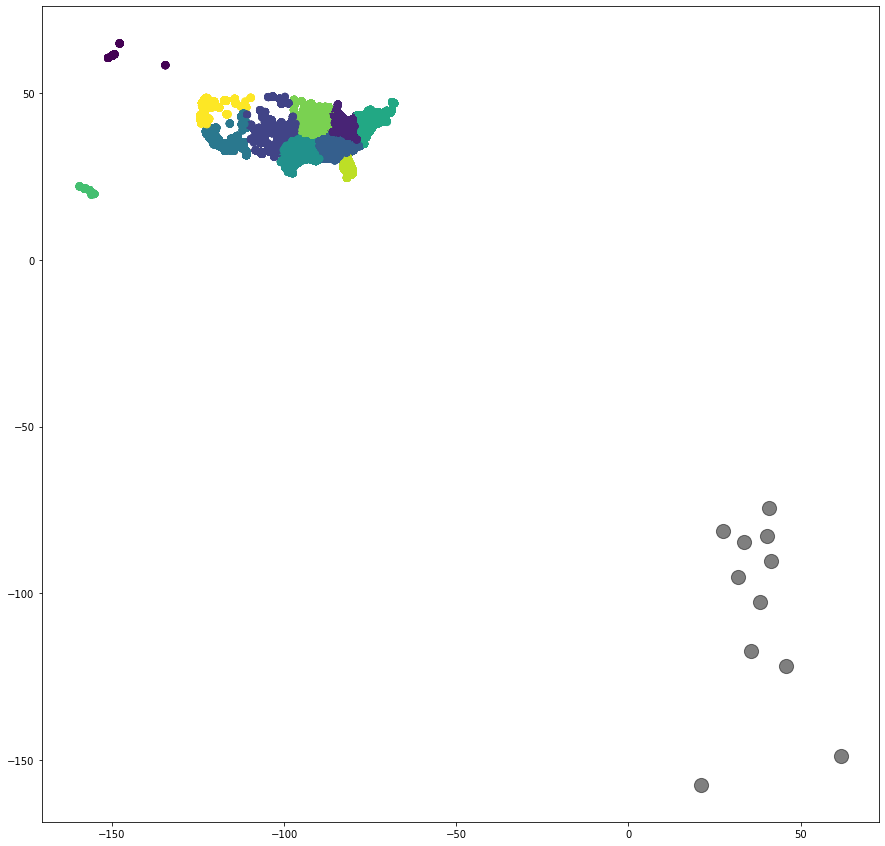

In [ ]:
plt.subplots(figsize=(15, 15))
plt.scatter(hosp_rec_df_second_copy['LONGITUDE'], hosp_rec_df_second_copy['LATITUDE'], c=y_kmeans2, s=50, cmap='viridis')
centers = k_means2.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5);

In [ ]:
hosp_rec_df_second_copy.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', ' Average Covered Charges ', 'Hospital Name',
       'City', 'State', 'ZIP Code', 'Hospital Ownership', 'Emergency Services',
       'Hospital overall rating', 'TYPE', 'LATITUDE', 'LONGITUDE', 'BEDS',
       'TRAUMA'],
      dtype='object')

In [ ]:
df_Outputs_KMeans = pd.DataFrame(hosp_rec_df_second_copy['Hospital overall rating'])

In [ ]:
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(hosp_rec_df_second_copy['LATITUDE']))
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(hosp_rec_df_second_copy['LONGITUDE']))
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(data=y_kmeans2, columns=["Center_Index"]))

In [ ]:
df_Outputs_KMeans

,Hospital Name,LATITUDE,LONGITUDE
0,SOUTHEAST ALABAMA MEDICAL CENTER,31.2163036480001,-85.3636311239999
1,SOUTHEAST ALABAMA MEDICAL CENTER,31.2163036480001,-85.3636311239999
2,SOUTHEAST ALABAMA MEDICAL CENTER,31.2163036480001,-85.3636311239999
3,SOUTHEAST ALABAMA MEDICAL CENTER,31.2163036480001,-85.3636311239999
4,SOUTHEAST ALABAMA MEDICAL CENTER,31.2163036480001,-85.3636311239999
...,...,...,...
110470,ADCARE HOSPITAL OF WORCESTER INC,42.2764120840001,-71.794919787
110471,HEALTHSOURCE SAGINAW,43.4547420960001,-84.0503374909999
110472,"WOODS AT PARKSIDE,THE",40.0271426950001,-82.8818433389999
110473,KENSINGTON HOSPITAL,39.9816993430001,-75.13462803


In [ ]:
closest_cluster_center = k_means2.predict(df_my_location)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
LocateCenters = df_Outputs_KMeans.loc[df_Outputs_KMeans["Center_Index"] == closest_cluster_center[0]] 
LocateCenters = LocateCenters.reset_index()
LocateCenters = LocateCenters.drop(['index'], axis=1)
LocateCenters = LocateCenters.drop(['Center_Index'], axis=1)
LocateCenters

,Hospital overall rating,LATITUDE,LONGITUDE
0,3,30.138778,-81.535385
1,3,30.138778,-81.535385
2,3,30.138778,-81.535385
3,3,30.138778,-81.535385
4,3,30.138778,-81.535385
...,...,...,...
8049,4,28.227968,-80.729332
8050,4,28.227968,-80.729332
8051,4,28.227968,-80.729332
8052,4,28.227968,-80.729332


In [ ]:
my_location = (my_lat, my_lon)

In [ ]:
# for i in LocateCenters.index:
#     hospital_location = (LocateCenters.iat[i,1], LocateCenters.iat[i,2])
#     LocateCenters.at[i, 'Estimated time(seg)'] = bing.travelTime(my_location, hospital_location )
#     LocateCenters.at[i, 'Estimated distance(km)'] = bing.travelDistance(my_location, hospital_location)

KeyboardInterrupt: ignored

In [ ]:
LocateCenters

,Hospital overall rating,LATITUDE,LONGITUDE,Tiempo_Estimado(seg),Distancia_Estimada(km),Estimated time(seg),Estimated distance(km)
0,3,30.138778,-81.535385,13916.0,412.637,13909.0,412.637
1,3,30.138778,-81.535385,13916.0,412.637,13909.0,412.637
2,3,30.138778,-81.535385,13916.0,412.637,13909.0,412.637
3,3,30.138778,-81.535385,13916.0,412.637,13909.0,412.637
4,3,30.138778,-81.535385,13916.0,412.637,13909.0,412.637
...,...,...,...,...,...,...,...
8049,4,28.227968,-80.729332,NaN,NaN,NaN,NaN
8050,4,28.227968,-80.729332,NaN,NaN,NaN,NaN
8051,4,28.227968,-80.729332,NaN,NaN,NaN,NaN
8052,4,28.227968,-80.729332,NaN,NaN,NaN,NaN


In [ ]:
"""
https://github.com/luischitala/Hospitals-Nearb-AI-Me/blob/master/Model%20%26%20Data%20Saturdays%20AI%20-%20Equipo%202/Code%20(ML)/Clustering_Coordinates/pybingmaps.py
"""

'\nhttps://github.com/luischitala/Hospitals-Nearb-AI-Me/blob/master/Model%20%26%20Data%20Saturdays%20AI%20-%20Equipo%202/Code%20(ML)/Clustering_Coordinates/pybingmaps.py\n'

## Stream-Lit

In [ ]:
ngrok.set_auth_token("2La2GbNYLGuJKhjKsni2LEnSgE8_7SSBXSXRAbcmiLQHHjMNK")

INFO:pyngrok.process:Updating authtoken for default "config_path" of "ngrok_path": /usr/local/lib/python3.8/dist-packages/pyngrok/bin/ngrok
2023-02-12 07:53:25.701 INFO    pyngrok.process: Updating authtoken for default "config_path" of "ngrok_path": /usr/local/lib/python3.8/dist-packages/pyngrok/bin/ngrok


In [ ]:
# %%writefile app.py
# loc_button = Button(label="Get Location", button_type="success")
# loc_button.js_on_click("button_click", CustomJS(code=
# """
#     navigator.geolocation.getCurrentPosition(
#         (loc) => {
#             document.dispatchEvent(new CustomEvent("GET_LOCATION", {detail: {lat: loc.coords.latitude, lon: loc.coords.longitude}}))
#         }
#     )
# """
# ))
# result = streamlit_bokeh_events(
#     loc_button,
#     events="GET_LOCATION",
#     key="get_location",
#     refresh_on_update=False,
#     override_height=75,
#     debounce_time=0)

# if result:
#     if "GET_LOCATION" in result:
#         st.write(result.get("GET_LOCATION"))

In [ ]:
# %%writefile app.py
# button = Button(label="Get Location")

# callback = CustomJS(code="""
# navigator.geolocation.getCurrentPosition(function(position) {
#   alert("Latitude: " + position.coords.latitude + 
#         "\\nLongitude: " + position.coords.longitude);
# });
# """)
# button.js_on_click(callback)

# streamlit_bokeh_events(button)

In [ ]:
%%writefile app.py
import streamlit as st
import geocoder

def location():
  g = geocoder.ip('me')
  
  return g.latlng

def main():
  st.title('Save Me Please!')
  html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Hospital Recommendation Engine</h2>
    </div>
  """
  st.markdown(html_temp,unsafe_allow_html=True)

  trauma = st.text_input("Emergency(Yes/No)","Type Here")
  # rating = st.text_input("Rating","Type Here")
  # money = st.text_input("Insurance(yes, no)", "Type Here")
  st.text_input("Describe your symptoms", "Type Here")
  col1, col2, col3 = st.columns(3)
  if col2.button('My location'):
    result = location()
    st.write('result: %s' % result)

if __name__ == '__main__':
  main()
  location()

Overwriting app.py


In [ ]:
!nohup streamlit run app.py --server.port 80 &
url = ngrok.connect(port = '80')
print(url)

nohup: appending output to 'nohup.out'


INFO:pyngrok.ngrok:Opening tunnel named: http-80-f209ddcf-4189-4d81-92e6-ff4664a6bc28
2023-02-12 09:24:41.110 INFO    pyngrok.ngrok: Opening tunnel named: http-80-f209ddcf-4189-4d81-92e6-ff4664a6bc28
INFO:pyngrok.process.ngrok:t=2023-02-12T09:24:41+0000 lvl=info msg="no configuration paths supplied"
2023-02-12 09:24:41.174 INFO    pyngrok.process.ngrok: t=2023-02-12T09:24:41+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2023-02-12T09:24:41+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2023-02-12 09:24:41.185 INFO    pyngrok.process.ngrok: t=2023-02-12T09:24:41+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2023-02-12T09:24:41+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2023-02-12 09:24:41.194 INFO    pyngrok.process.ngrok: t=2023-02-12T09:24:41+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngro

NgrokTunnel: "http://9c66-35-188-70-144.ngrok.io" -> "http://localhost:80"


INFO:pyngrok.process.ngrok:t=2023-02-12T09:24:41+0000 lvl=info msg="started tunnel" obj=tunnels name=http-80-f209ddcf-4189-4d81-92e6-ff4664a6bc28 addr=http://localhost:80 url=https://9c66-35-188-70-144.ngrok.io
2023-02-12 09:24:41.493 INFO    pyngrok.process.ngrok: t=2023-02-12T09:24:41+0000 lvl=info msg="started tunnel" obj=tunnels name=http-80-f209ddcf-4189-4d81-92e6-ff4664a6bc28 addr=http://localhost:80 url=https://9c66-35-188-70-144.ngrok.io
INFO:pyngrok.process.ngrok:t=2023-02-12T09:24:41+0000 lvl=info msg=end pg=/api/tunnels id=f7150f0b2eabd6c6 status=201 dur=83.759495ms
2023-02-12 09:24:41.503 INFO    pyngrok.process.ngrok: t=2023-02-12T09:24:41+0000 lvl=info msg=end pg=/api/tunnels id=f7150f0b2eabd6c6 status=201 dur=83.759495ms
INFO:pyngrok.process.ngrok:t=2023-02-12T09:24:41+0000 lvl=info msg=start pg="/api/tunnels/http-80-f209ddcf-4189-4d81-92e6-ff4664a6bc28 (http)" id=305de5a63fc27e7e
2023-02-12 09:24:41.508 INFO    pyngrok.process.ngrok: t=2023-02-12T09:24:41+0000 lvl=info 

In [ ]:
from pyngrok import ngrok

tunnels = ngrok.get_tunnels()
tunnels

INFO:pyngrok.process.ngrok:t=2023-02-12T07:54:18+0000 lvl=info msg=start pg=/api/tunnels id=5598128ada7b96b3
2023-02-12 07:54:18.288 INFO    pyngrok.process.ngrok: t=2023-02-12T07:54:18+0000 lvl=info msg=start pg=/api/tunnels id=5598128ada7b96b3
INFO:pyngrok.process.ngrok:t=2023-02-12T07:54:18+0000 lvl=info msg=end pg=/api/tunnels id=5598128ada7b96b3 status=200 dur=280.153µs
2023-02-12 07:54:18.296 INFO    pyngrok.process.ngrok: t=2023-02-12T07:54:18+0000 lvl=info msg=end pg=/api/tunnels id=5598128ada7b96b3 status=200 dur=280.153µs


[<NgrokTunnel: "https://de63-35-188-70-144.ngrok.io" -> "http://localhost:80">,
 <NgrokTunnel: "http://de63-35-188-70-144.ngrok.io" -> "http://localhost:80">]

In [ ]:
#!pip install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 22.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=98a009236d4da4f9542dae01534ebf2dd52d52bf03d64bb7bcdc6c0a421c2558
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempti

## OCR

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 14.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


In [ ]:
import easyocr

In [ ]:
reader = easyocr.Reader(['es', 'en'])

2023-02-12 05:02:54.312 WARNING easyocr.easyocr: CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
2023-02-12 05:02:54.323 WARNING easyocr.easyocr: Downloading detection model, please wait. This may take several minutes depending upon your network connection.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

INFO:easyocr.easyocr:Download complete
2023-02-12 05:03:04.022 INFO    easyocr.easyocr: Download complete
2023-02-12 05:03:04.030 WARNING easyocr.easyocr: Downloading recognition model, please wait. This may take several minutes depending upon your network connection.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

INFO:easyocr.easyocr:Download complete.
2023-02-12 05:03:07.062 INFO    easyocr.easyocr: Download complete.


In [ ]:
reader.readtext('/content/how-to-read-medication-label-nursing-quiz.png', detail = 0, paragraph=False)

FileNotFoundError: ignored

## NLP

In [ ]:
import nltk
#nltk.download('punkt')
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
import nltk
import pandas as pd
from geopy import distance
from geopy import Point

sentence = "I broke my finger"

# Breaks down sentence into words
TOKENS = nltk.word_tokenize(sentence)

# Converts all words to lowercase
lc_words = (map(lambda x: x.lower(), TOKENS))
tokens = list(lc_words)

# Takes the words and conducts parts of speech tagging
tagged = nltk.pos_tag(tokens)

severe = {"broke", "severed", "unconcious", "smashed", "bent", "impaled","gushing"}

sev_trauma = {'LEVEL I', 'LEVEL II'}
norm_trauma = {'LEVEL I', 'LEVEL II', 'LEVEL III', 'LEVEL IV', 'LEVEL V'}

sum = 0
trauma_status = []

# Checks tokens for any severe responses to determine level of trauma center needed
for i in tokens:
  if i in severe:
    sum = sum + 1


if sum > 0:
  trauma_status = sev_trauma
else:
  trauma_status = norm_trauma

print (trauma_status)

# subsets hospital data based off required trauma level

# trauma_hosp = hosp_rec_df[hosp_rec_df["TRAUMA"] in trauma_status]

# print(trauma_hosp)

print(g.latlng)

nrows = hosp_rec_df.shape[0]
print(nrows)
for i in range(0, nrows):
  hosp_coords = Point([hosp_rec_df.loc[i,'LATITUDE'], hosp_rec_df.loc[i,'LONGITUDE']])
  
  result = distance.distance(g.latlng,hosp_coords).miles
  print(result)



Streaming output truncated to the last 5000 lines.
379.238324647935
379.238324647935
379.238324647935
379.238324647935
379.238324647935
379.238324647935
351.9583744270378
351.9583744270378
351.9583744270378
351.9583744270378
351.9583744270378
351.9583744270378
351.9583744270378
351.9583744270378
351.9583744270378
351.9583744270378
351.9583744270378
351.9583744270378
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.54174606528153
349.

In [ ]:
!pip install nltk



In [ ]:
!pip install autocorrect

In [ ]:
!pip install requests

In [ ]:
!pip install geocoder

In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
